C:\Users\HP\AppData\Local\Temp\ipykernel_2912\3782600670.py:11: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  oceanic_data = pd.read_csv("C:/Users/HP/Desktop/Social_Work/datasets/bottle.csv")


(864863, 74)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814247 entries, 0 to 814246
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   T_degC  814247 non-null  float64
 1   Salnty  814247 non-null  float64
dtypes: float64(2)
memory usage: 12.4 MB
None


TypeError: Figure.savefig() missing 1 required positional argument: 'fname'

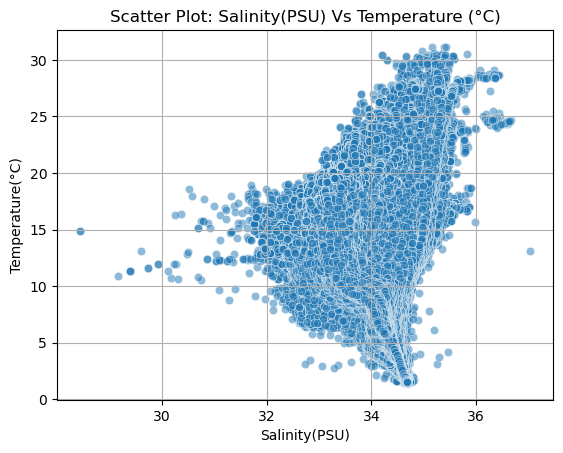

In [20]:
# import  all modules for this project  
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score, mean_squared_error
import joblib

#Load the dataset 
oceanic_data = pd.read_csv("C:/Users/HP/Desktop/Social_Work/datasets/bottle.csv")
oceanic_data.columns 
print(oceanic_data.shape)
oceanic_data.head()

#data cleaning section 
# keep only rows where "T_degC" and "Salinity" are not null(missing)
df = oceanic_data[["T_degC", "Salnty"]].dropna()
# reset index after data cleaning 
df.reset_index(drop = True, inplace = True)

#check your data types and data summary 
print(df.info())
df.describe()

# Visualise the relatioship to check for linearity 
sns.scatterplot(x = "Salnty", y = "T_degC", data = df, alpha= 0.5)
plt.title("Scatter Plot: Salinity(PSU) Vs Temperature (\u00B0C)")
plt.xlabel("Salinity(PSU)")
plt.ylabel("Temperature(\u00B0C)")
plt.grid(True)

# Save the scatter-plot
plt.savefig()
plt.show("Scatter_plot.png")

#Prepare the data for regression 
X= df[["Salnty"]] # Predictor Variable 
y = df[["T_degC"]] # Target Variable 

# Build and train the regression model 
model = LinearRegression()
model.fit(X,y)

# Visualise the regression line on a scatter plot 
plt.figure(figsize=(10,6))
sns.scatterplot(x = "Salnty", y ="T_degC", data = df, alpha = 0.4, label = "Actual")
plt.plot(df["Salnty"], model.predict(X), color = "orange", label = "Regression Line")
plt.title("Linear Regression: Salinity (PSU) Vs Temperature (\u00B0C)")
plt.xlabel("Salinity (PSU)")
plt.ylabel("Temperature (\u00B0C)")
plt.legend()
plt.grid(True)

# Save the Linear-Regression-plot
plt.savefig("Linear_Regression_plot.png")
plt.show()



# evaluate the model 
y_pred = model. predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y,y_pred)

print(f"R-Squared Score: {r2:.3f}")
print(f"Mean Squared Error:{mse:.3f}")

# save the model for later 
joblib.dump(model, "Salinity_temperature_model.pkl")

# interpret the regression results 
intercept = model.intercept_ 
coefficient = model.coef_[0]

print(f"Intercept: {intercept[0]:.3f}")
print(f"Coefficient: {coefficient[0]:.3f}")

import shutil
# Copy this notebook to another folder 
shutil.copy("Bottle_Regression.ipynb", "C:/Users/HP/Desktop/ocean-salinity-regression/Bottle_Regression.ipynb")

In [19]:
import os 
print(os.getcwd())

C:\Users\HP
